
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [46]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Delft, Netherlands

In [47]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 1 # 6 minutes hour of simulation
params.nP = 500 # reuqests (and passengers)
params.nV = 20 # vehicles



## Parameters for ExMAS

In [48]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.25
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_veh' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [18]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

03-04-23 10:49:26-INFO-Initializing pairwise trip shareability between 500 and 500 trips.
03-04-23 10:49:26-INFO-creating combinations
03-04-23 10:49:26-INFO-249500	 nR*(nR-1)
03-04-23 10:49:31-INFO-Reduction of feasible pairs by 99.34%
03-04-23 10:49:31-INFO-Degree 2 	Completed
03-04-23 10:49:31-INFO-trips to extend at degree 2 : 4210
03-04-23 10:49:39-INFO-At degree 2 feasible extensions found out of 1797 searched
03-04-23 10:49:39-INFO-Degree 3 	Completed
03-04-23 10:49:39-INFO-trips to extend at degree 3 : 1797
03-04-23 10:49:42-INFO-At degree 3 feasible extensions found out of 564 searched
03-04-23 10:49:42-INFO-Degree 4 	Completed
03-04-23 10:49:42-INFO-Max degree reached 4
03-04-23 10:49:42-INFO-Trips still possible to extend at degree 4 : 564


In [19]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

03-04-23 10:49:45-INFO-Matching 500 trips to 7071 rides in order to min u_veh
03-04-23 10:49:48-INFO-Problem solution: Optimal. 
Total costs for single trips:        133,897 
reduced by matching to:               92,520


In [20]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],1.621500,87,1,[1.6215],"[0, 87]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 1435362498, 1435362342]","[None, 0, 0]",node time req_id od 0 ...,87,0.87,1.317000,0.263400,1.0536
1,[1],6.985000,377,1,[6.984999999999999],"[7, 377]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44884122, 44790565]","[None, 1, 1]",node time req_id od 0 NaN...,377,3.77,5.665500,1.133100,4.5324
2,[2],1.523000,82,1,[1.5230000000000001],"[31, 82]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44840453, 1391417256]","[None, 2, 2]",node time req_id od 0 ...,82,0.82,1.236000,0.247200,0.9888
3,[3],1.486000,80,1,[1.486],"[51, 80]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44798266, 44808574]","[None, 3, 3]",node time req_id od 0 NaN...,80,0.80,1.206000,0.241200,0.9648
4,[4],6.220500,336,1,[6.2205],"[55, 336]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44857290, 1515837165]","[None, 4, 4]",node time req_id od 0 ...,336,3.36,5.044500,1.008900,4.0356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,"[364, 335, 382, 369]",26.899700,843,40,"[5.0756, 4.886725, 8.215725, 8.72165]","[2547.5, 3, 48, 97, 132, 79, 221, 263]","[364, 335, 382, 369]","[335, 364, 382, 369]",4,7066,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44875434, 44876219, 44884491, 232310815...","[None, 364, 335, 382, 369, 335, 364, 382, 369]",node time req_id od 0 ...,843,8.43,17.190000,3.438000,13.7520
7067,"[364, 371, 353, 369]",26.167050,871,40,"[5.3668, 4.531625, 7.501475000000001, 8.76715]","[2639.5, 3, 71, 117, 115, 119, 138, 308]","[364, 371, 353, 369]","[371, 364, 353, 369]",4,7067,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44875434, 44876219, 365993500, 23231081...","[None, 364, 371, 353, 369, 371, 364, 353, 369]",node time req_id od 0 ...,871,8.71,16.789500,3.357900,13.4316
7068,"[364, 371, 353, 382]",26.161625,777,40,"[5.4669, 4.631725, 7.601575, 8.461425]","[2639.5, 3, 71, 47, 207, 119, 138, 192]","[364, 371, 353, 382]","[371, 364, 353, 382]",4,7068,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44875434, 44876219, 365993500, 44884491...","[None, 364, 371, 353, 382, 371, 364, 353, 382]",node time req_id od 0 ...,777,7.77,16.561125,3.312225,13.2489
7069,"[364, 371, 369, 393]",25.761725,780,40,"[5.3395, 4.254075, 8.1347, 8.03345]","[2639.5, 3, 146, 21, 116, 119, 315, 60]","[364, 371, 369, 393]","[371, 364, 369, 393]",4,7069,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44875434, 44876219, 2323108159, 4487134...","[None, 364, 371, 369, 393, 371, 364, 369, 393]",node time req_id od 0 ...,780,7.80,16.925625,3.385125,13.5405


In [21]:
params.kpi = 1

In [22]:
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate

#sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/veh{}.csv'.format(i))

03-04-23 10:51:40-INFO-Matching 500 trips to 7071 rides in order to min u_veh
03-04-23 10:51:44-INFO-Problem solution: Optimal. 
Total costs for single trips:        133,897 
reduced by matching to:               92,520
0.5
0.5
03-04-23 10:53:31-CRITICAL-this is request 1 with [1, 532, 741, 789, 1572, 1757, 2291, 3011, 3351, 3352, 3353, 4879, 4880, 4881] available rides.
03-04-23 10:53:31-CRITICAL-ride 1 available [1]
03-04-23 10:53:31-CRITICAL-ride 532 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 741 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 789 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 1572 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 1757 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 2291 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 3011 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 3351 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 3352 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 3353 available [1, 0]
03-04-23 10:53:31-CRITICAL-ride 4879 avai

In [23]:
df = sim.res[0].veh_exp

In [24]:
import seaborn as sns

In [25]:
df

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,7.0,0.0,False,0,0,50.0,15.0,0,120.0,0,...,0,0,0.0,795.0,3600.0,1039.0,375.0,-5809.0,25.311,6.7908
2,13.0,0.0,False,0,0,143.0,15.0,0,222.0,0,...,0,0,0.0,1846.0,3600.0,1404.0,627.0,-7477.0,44.192,7.5447
3,17.0,0.0,False,0,0,193.0,29.0,0,140.0,0,...,0,0,6058.0,2386.0,0.0,1483.0,679.0,1510.0,52.722,7.0335
4,5.0,0.0,False,0,0,242.0,15.0,0,100.0,0,...,0,0,0.0,612.0,3600.0,935.0,265.0,-5412.0,10.066,2.2476
5,10.0,0.0,False,0,0,81.0,15.0,0,121.0,0,...,0,0,8012.0,1084.0,0.0,1186.0,436.0,5306.0,25.803,3.6135
6,7.0,0.0,False,0,0,230.0,15.0,0,220.0,0,...,0,0,8329.0,1136.0,0.0,659.0,445.0,6089.0,21.027,7.6302
7,10.0,0.0,False,0,0,183.0,15.0,0,80.0,0,...,0,0,7992.0,1090.0,0.0,1139.0,395.0,5368.0,23.647,2.1900
8,12.0,0.0,False,0,0,167.0,5.0,0,130.0,0,...,0,0,7923.0,1108.0,0.0,1106.0,495.0,5214.0,21.457,2.1564
9,2.0,0.0,False,0,0,212.0,15.0,0,212.0,0,...,0,0,0.0,412.0,3600.0,462.0,287.0,-4761.0,8.839,5.1030


In [26]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/ProfitMax.csv')

In [27]:
sim.res[0].veh_exp['REVENUE'].to_list()

[6.7908,
 7.544700000000001,
 7.033500000000001,
 2.2476,
 3.6135000000000006,
 7.630199999999999,
 2.19,
 2.1564,
 5.103,
 7.145099999999999,
 5.370300000000001,
 2.9844,
 2.886,
 5.886,
 2.4936,
 2.4888,
 5.2956,
 0.0,
 12.447000000000003,
 2.1588000000000003]

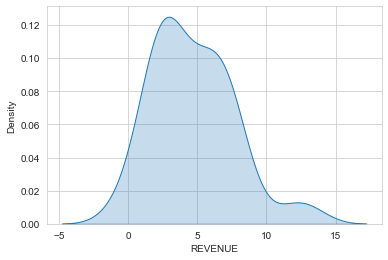

In [28]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.kdeplot(df.REVENUE, shade=True)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total Revenue of all the driver 

In [29]:
sim.res[0].all_kpi # All driver revenue 

93.4653

# Strategy 2: 

# params.kpi = 2 (Pooled Ride - Nearest) 


In [30]:
params.kpi = 2

In [31]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate


03-04-23 10:56:10-WARNING-Setting up 1h simulation at 2023-04-03 10:19:29 for 20 vehicles and 500 passengers in Delft, Netherlands
0.5
0.5
03-04-23 10:56:12-CRITICAL-this is request 1 with [1, 532, 741, 789, 1572, 1757, 2291, 3011, 3351, 3352, 3353, 4879, 4880, 4881] available rides.
03-04-23 10:56:12-CRITICAL-ride 1 available [1]
03-04-23 10:56:12-CRITICAL-ride 532 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 741 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 789 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 1572 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 1757 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 2291 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 3011 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 3351 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 3352 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 3353 available [1, 0]
03-04-23 10:56:12-CRITICAL-ride 4879 available [1, 0, 0]
03-04-23 10:56:12-CRITICAL-ride 4880 available [1, 0, 0]
03-04-23 10:56:1

In [32]:
df = sim.res[0].veh_exp

In [33]:
df

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,3.0,0.0,False,0,0,20.0,15.0,0,92.0,0,...,0,0,9677.0,505.0,0.0,400.0,197.0,8575.0,7.697,6.1371
2,12.0,0.0,False,0,0,158.0,15.0,0,220.0,0,...,0,0,7403.0,1728.0,0.0,942.0,568.0,4165.0,30.344,0.3504
3,14.0,0.0,False,0,0,213.0,15.0,0,253.0,0,...,0,0,7017.0,1826.0,0.0,1055.0,688.0,3448.0,25.245,2.4936
4,9.0,0.0,False,0,0,133.0,25.0,0,120.0,0,...,0,0,8273.0,1157.0,0.0,821.0,415.0,5880.0,16.769,0.6720
5,12.0,0.0,False,0,0,193.0,15.0,0,241.0,0,...,0,0,0.0,1198.0,3600.0,899.0,616.0,-6313.0,25.931,1.1736
6,7.0,0.0,False,0,0,210.0,19.0,0,106.0,0,...,0,0,0.0,748.0,3600.0,843.0,335.0,-5526.0,13.748,5.2200
7,8.0,0.0,False,0,0,71.0,15.0,0,115.0,0,...,0,0,8573.0,863.0,0.0,922.0,370.0,6418.0,21.788,4.4388
8,14.0,0.0,False,0,0,157.0,5.0,0,158.0,0,...,0,0,6693.0,2372.0,0.0,1011.0,566.0,2744.0,45.839,10.8891
9,3.0,0.0,False,0,0,232.0,29.0,0,80.0,0,...,0,0,0.0,438.0,3600.0,587.0,199.0,-4824.0,14.273,1.9452


In [34]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/PooledRide.csv')

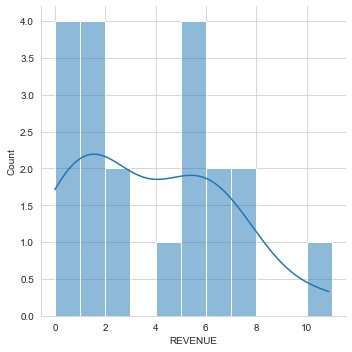

In [35]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

In [36]:
sim.res[0].veh_exp['REVENUE'].to_list()

[6.1371,
 0.35039999999999993,
 2.4936,
 0.672,
 1.1736,
 5.22,
 4.4388000000000005,
 10.8891,
 1.9451999999999998,
 7.544700000000001,
 2.1803999999999997,
 0.0,
 7.630199999999999,
 5.886,
 1.4940000000000002,
 5.2956,
 5.103,
 6.7908,
 0.0,
 1.9008000000000003]

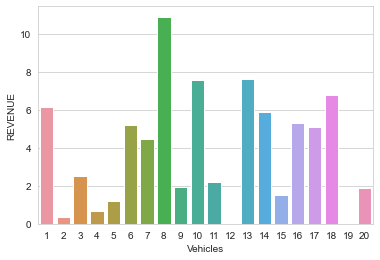

In [37]:
import seaborn as sns
sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver

In [38]:
sim.res[0].all_kpi # All driver revenue 

77.1453

# Strategy 3: 
# params.kpi = 3 (Private ride)


In [39]:
params.kpi = 3

In [40]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

03-04-23 10:58:30-WARNING-Setting up 1h simulation at 2023-04-03 10:19:29 for 20 vehicles and 500 passengers in Delft, Netherlands
0.5
0.5
03-04-23 10:58:32-CRITICAL-this is request 1 with [1, 532, 741, 789, 1572, 1757, 2291, 3011, 3351, 3352, 3353, 4879, 4880, 4881] available rides.
03-04-23 10:58:32-CRITICAL-ride 1 available [1]
03-04-23 10:58:32-CRITICAL-ride 532 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 741 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 789 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 1572 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 1757 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 2291 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 3011 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 3351 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 3352 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 3353 available [1, 0]
03-04-23 10:58:32-CRITICAL-ride 4879 available [1, 0, 0]
03-04-23 10:58:32-CRITICAL-ride 4880 available [1, 0, 0]
03-04-23 10:58:3

In [41]:
df = sim.res[0].veh_exp

In [42]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/PrivateRide.csv')

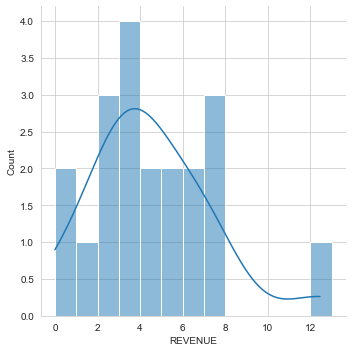

In [43]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

In [44]:
sim.res[0].veh_exp['REVENUE'].to_list()

[4.1643,
 12.447000000000003,
 3.8016000000000005,
 2.4888,
 7.630199999999999,
 0.672,
 7.544700000000001,
 3.4968000000000004,
 7.145099999999999,
 4.2084,
 6.012,
 3.4668,
 6.1371,
 5.370300000000001,
 1.86,
 2.886,
 5.103,
 3.4188,
 2.4936,
 0.0]

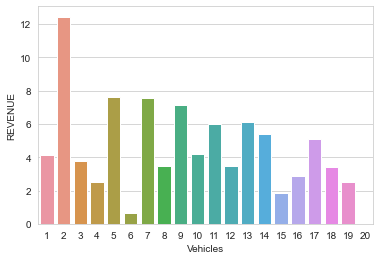

In [45]:
import seaborn as sns

sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")

#ax.set(xlabel=None)
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver 

In [90]:
sim.res[0].all_kpi # All driver revenue 

79.08059999999999

# All in one Simulation  

In [ ]:
responses = []
avg_kpi = []
idle_time = []

for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate
    sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/veh{}.csv'.format(i))
    sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/pax{}.csv'.format(i))
    #driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)['Vehicles'] = sim.res[0].veh_exp.index
    #sim.res[0].veh_exp['ds'] = f"{i}"
    
    #responses.append(sim.res[0].veh_exp)
     
   # vehicles = sim.res[0].veh_exp.loc[sim.res[0].veh_exp["nRIDES"] > 0]
    #no_of_veh = len(vehicles)
    
    #avg_kpi.append(sim.res[0].all_kpi/no_of_veh)
    #idle_time.append(vehicles['IDLE'].sum()/no_of_veh)
    
    #_inData.sblts.rides['commission'] = _inData.sblts.rides.apply(lambda row: row.fare*sp.comm_rate, axis=1)
    

0.5
0.5
11-04-23 12:52:14-CRITICAL-this is request 1 with [1, 532, 741, 789, 1572, 1757, 2291, 3011, 3351, 3352, 3353, 4879, 4880, 4881] available rides.
11-04-23 12:52:14-CRITICAL-ride 1 available [1]
11-04-23 12:52:14-CRITICAL-ride 532 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 741 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 789 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 1572 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 1757 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 2291 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 3011 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 3351 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 3352 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 3353 available [1, 0]
11-04-23 12:52:14-CRITICAL-ride 4879 available [1, 0, 0]
11-04-23 12:52:14-CRITICAL-ride 4880 available [1, 0, 0]
11-04-23 12:52:14-CRITICAL-ride 4881 available [1, 0, 0]
11-04-23 12:52:14-CRITICAL-this is reuqest 1 with [1, 532, 741, 789, 1572, 1757, 2291, 301

# Performance Parameters for Driver

In [ ]:
import pandas as pd
index = pd.Index(['Revenue', 'Profit', 'Cost', 'Idle Time'])
driver_data = pd.DataFrame({"Profit Maximization":[], "Pooled Ride": [], "Private Ride": []})
driver_data.loc['Revenue'] = avg_kpi
driver_data.loc['Idle Time'] = idle_time
driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)

In [ ]:
driver_data

In [ ]:
csv_data = driver_data.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/nV20.csv')

In [ ]:
print('\nCSV String:\n', csv_data)